In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


%matplotlib inline


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [9]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [10]:
mdata = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
print(mdata)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [13]:
len(mdata)#train(학습데이터), test(테스트대이터)

2

In [14]:
len(mdata[0]) # x, y 데이터 2개

2

In [16]:
len(mdata[1])

2

In [18]:
len(mdata[0][0])

60000

In [19]:
type(mdata[0][0])

numpy.ndarray

In [20]:
len(mdata[0][1])

60000

In [21]:
mdata[0][0].shape

(60000, 28, 28)

In [22]:
img = mdata[0][0][0]
print(mdata[0][1][0])

5


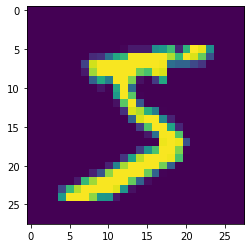

In [24]:
plt.imshow(img)

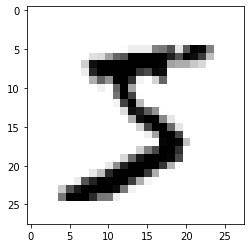

In [25]:
plt.imshow(img, cmap = plt.cm.binary)

In [32]:
def show_num(img, tag):
  plt.imshow(img, cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('tag :'+str(tag), size = 40)
  plt.show()



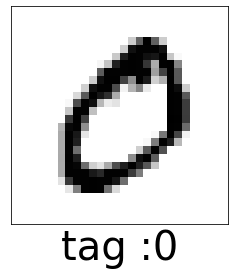

In [33]:
img = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(img,tag)

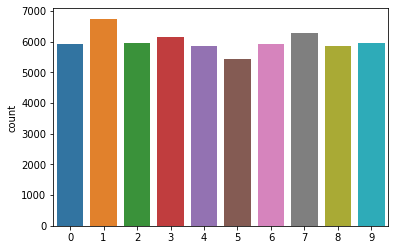

In [34]:
sns.countplot(mdata[0][1])

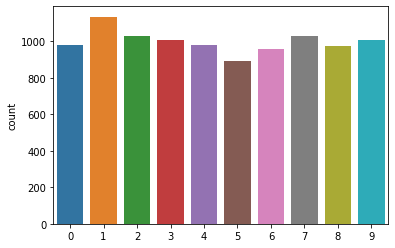

In [35]:
sns.countplot(mdata[1][1])

In [36]:
(x_train, y_train),(x_test, y_test) = mdata

In [37]:
print(len(x_train))
print(len(x_test))

60000
10000


In [38]:
x_train[0].max()

255

In [39]:
x_train[0].min()

0

In [40]:
x_train, x_test = x_train/255.0, x_test/255.0

In [41]:
x_train[0].max()

1.0

In [42]:
x_train[0].min()

0.0

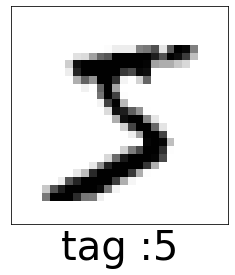

In [43]:
show_num(x_train[0],y_train[0])

In [49]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation = 'softmax')
                          
])


In [51]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [56]:
for i in range(10):
  model.fit(x_train,y_train,epochs = 5)
  i += 1

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9932
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0197 - accuracy: 0.9930
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9942
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0174 - accurac

In [58]:
model.evaluate(x_test,y_test, verbose = 2)

313/313 - 0s - loss: 0.1154 - accuracy: 0.9818


[0.11541382968425751, 0.9818000197410583]

In [60]:
result = model.predict(x_test)

In [66]:
result[0] 

array([5.1414458e-20, 4.4628370e-23, 5.1162955e-16, 1.4634619e-10,
       7.3304721e-28, 3.9591941e-17, 1.6878019e-36, 1.0000000e+00,
       1.2527012e-18, 2.9444043e-15], dtype=float32)

In [69]:
i = result[0].max()
i

1.0

In [64]:
result[0].tolist().index(i)

7

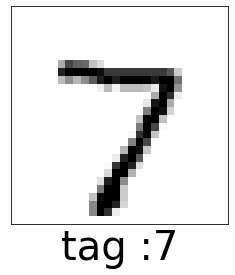

In [65]:
show_num(x_test[0],y_test[0])